<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split


### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [3]:
data = pd.read_csv('boston.csv', index_col=0)

In [4]:
data

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0    0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1    0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2    0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3    0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4    0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   
..    ...   ...    ...   ...  ...  ...   ...  ...  ...    ...      ...    ...   
501  0.06  0.00  11.93  0.00 0.57 6.59 69.10 2.48 1.00 273.00    21.00 391.99   
502  0.05  0.00  11.93  0.00 0.57 6.12 76.70 2.29 1.00 273.00    21.00 396.90   
503  0.06  0.00  11.93  0.00 0.57 6.98 91.00 2.17 1.00 273.00    21.00 396.90   
504  0.11  0.00  11.93  0.00 0.57 6.79 89.30 2.39 1.00 273.00    21.00 393.45   
505  0.05  0.00  11.93  0.00 0.57 6.03 80.80 2.50 1.00 273.00    21.00 396.90   

     LSTAT  PRICE  
0     4.98  24.00  
1     9.14  21.60  
2     4.03  34.70  
3     2.94  33.40  
4     5.33  36.20  
..     ...    ...  
501   9.67  22.40  
502   9.08  20.60  
503   5.64  23.90  
504   6.48  22.00  
505   7.88  11.90  

[506 rows x 14 columns]

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
data.shape

(506, 14)

In [6]:
len(data.columns)

14

In [7]:
data.shape[0]

506

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
column_explanations = [
    'per capita crime rate by town',
    'proportion of residential land zoned for lots over 25,000 sq.ft.',
     'proportion of non-retail business acres per town',
    'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
   'nitric oxides concentration (parts per 10 million)',
   'average number of rooms per dwelling',
   'proportion of owner-occupied units built prior to 1940',
    'weighted distances to five Boston employment centres',
    'index of accessibility to radial highways',
    'full-value property-tax rate per $10,000',
     'pupil-teacher ratio by town',
    '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    '% lower status of the population',
    'Median value of owner-occupied homes in $1000'
]

In [10]:
for col,col_explanation in zip(data.columns, column_explanations):
    print(col, '\t', col_explanation)

CRIM 	 per capita crime rate by town
ZN 	 proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS 	 proportion of non-retail business acres per town
CHAS 	 Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX 	 nitric oxides concentration (parts per 10 million)
RM 	 average number of rooms per dwelling
AGE 	 proportion of owner-occupied units built prior to 1940
DIS 	 weighted distances to five Boston employment centres
RAD 	 index of accessibility to radial highways
TAX 	 full-value property-tax rate per $10,000
PTRATIO 	 pupil-teacher ratio by town
B 	 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT 	 % lower status of the population
PRICE 	 Median value of owner-occupied homes in $1000


## Data Cleaning - Check for Missing Values and Duplicates

In [11]:
data.isnull().values.any()

False

In [12]:
data.duplicated().values.any()

False

## Descriptive Statistics

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [13]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [14]:
print(f"There is an average of {data.PTRATIO.mean():.2f} students per teacher")

There is an average of 18.46 students per teacher


In [15]:
print(f"The average price of a home is: ${data.PRICE.mean()*1000:.2f}")

The average price of a home is: $22532.81


In [16]:
print("What even is the CHAS feature? ")
data.CHAS.unique()

What even is the CHAS feature? 


array([0., 1.])

In [17]:
print("The Charles River feature or the CHAS feature is either 0/1 indicating whether the property is adjacent to the river")

The Charles River feature or the CHAS feature is either 0/1 indicating whether the property is adjacent to the river


In [18]:
print(f"The minimum value of CHAS is:{data.CHAS.min()} and the maximum value is:{data.CHAS.max()} ")

The minimum value of CHAS is:0.0 and the maximum value is:1.0 


In [19]:
print(f"The minimum number of rooms is:{data.RM.min()}")
print(f"The maximum number of rooms is:{data.RM.max()}")

The minimum number of rooms is:3.561
The maximum number of rooms is:8.78


In [20]:
print("Let us look at some info of the data:\n ")
data.info()

Let us look at some info of the data:
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [21]:
print("Let us look at some stat of the data:\n")
data.describe()

Let us look at some stat of the data:



CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23  16.96  25.00  
max      22.00 396.90  37.97  50.00

<h2>Interpreting the std:</h2>

The standard deviation (SD) is a single number that summarizes the variability in a dataset. It represents the typical distance between each data point and the mean. Smaller values indicate that the data points cluster closer to the mean—the values in the dataset are relatively consistent. Conversely, higher values signify that the values spread out further from the mean. Data values become more dissimilar, and extreme values become more likely.

The standard deviation uses the original data units, simplifying the interpretation. For this reason, it is the most widely used measure of variability. Suppose a pizza restaurant measures its delivery time in minutes and has an SD of 5. In that case, the interpretation is that the typical delivery occurs 5 minutes before or after the mean time. Statisticians often report the standard deviation with the mean: 20 minutes (StDev 5). If another pizza restaurant has a standard deviation of 10 minutes, we know that its delivery service is more inconsistent.

<h2>Interpreting the Quartiles: </h2>
Quartiles are three values that split sorted data into four parts, each with an equal number of observations.
Quartiles are a type of quantile.

First quartile: Also known as Q1, or the lower quartile. This is the number halfway between the lowest number and the middle number.

Second quartile: Also known as Q2, or the median. This is the middle number halfway between the lowest number and the highest number.

Third quartile: Also known as Q3, or the upper quartile. This is the number halfway between the middle number and the highest number.


<img src="https://www.scribbr.com/wp-content/uploads/2022/05/Quartile-example.webp"/>




<h3>Interpreting quartiles</h3>

Quartiles can give you useful information about an observation or a dataset.

Comparing observations
Quartiles are helpful for understanding an observation in the context of the rest of a sample or population. By comparing the observation to the quartiles, you can determine whether the observation is in the bottom 25%, middle 50%, or top 25%.

Median
The second quartile, better known as the median, is a measure of central tendency. This middle number is a good measure of the average or most central value of the data, especially for skewed distributions or distributions with outliers.

Interquartile range
The distance between the first and third quartiles—the interquartile range (IQR)—is a measure of variability. It indicates the spread of the middle 50% of the data.

IQR = Q3 − Q1
The IQR is an especially good measure of variability for skewed distributions or distributions with outliers. IQR only includes the middle 50% of the data, so, unlike the range, the IQR isn’t affected by extreme values.

Skewness
The distance between quartiles can give you a hint about whether a distribution is skewed or symmetrical. It’s easiest to use a boxplot to look at the distances between quartiles:





## Visualise the Features

Having looked at some descriptive statistics, visualise the data for your model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

Try setting the `aspect` parameter to `2` for a better picture. 

What do you notice in the distributions of the data? 

In [22]:
data_to_plot = [data.PRICE, data.RM, data.DIS, data.RAD]

#### House Prices 💰

In [23]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [24]:
data.PRICE.sample(4)

477   12.00
348   24.50
374   13.80
208   24.40
Name: PRICE, dtype: float64

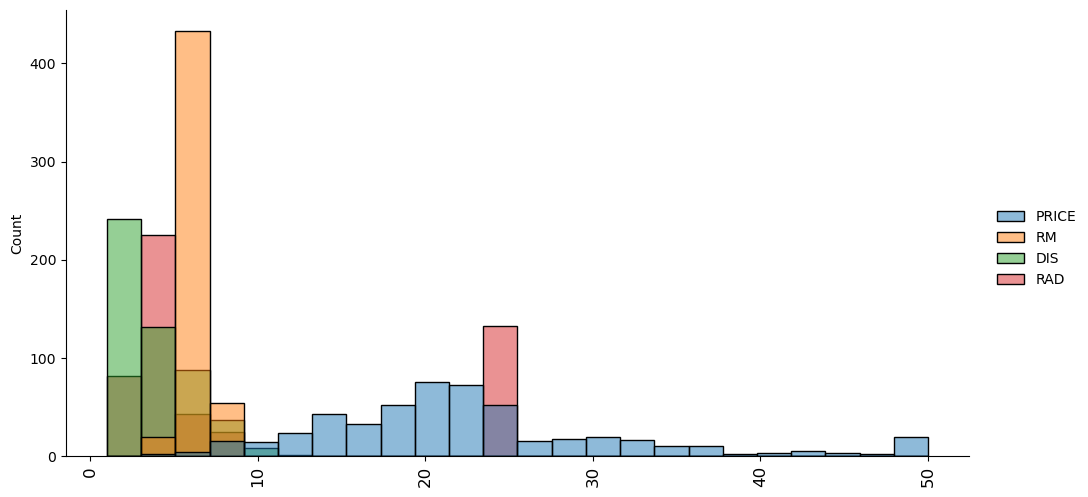

In [25]:

sns.displot(data_to_plot,
            aspect=2,
           legend=True,
           )

plt.xticks(label="Columns",
           rotation=90,
          fontsize=12
          )

plt.show()


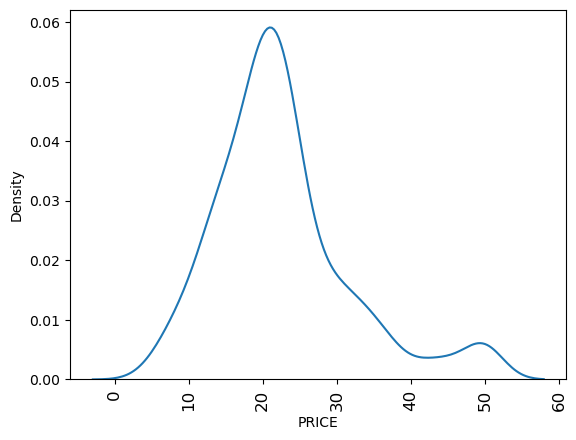

In [26]:
sns.kdeplot(data,
            x=data.PRICE)

plt.xticks(label="Columns",
           rotation=90,
          fontsize=12
          )

plt.show()

#### Distance to Employment - Length of Commute 🚗

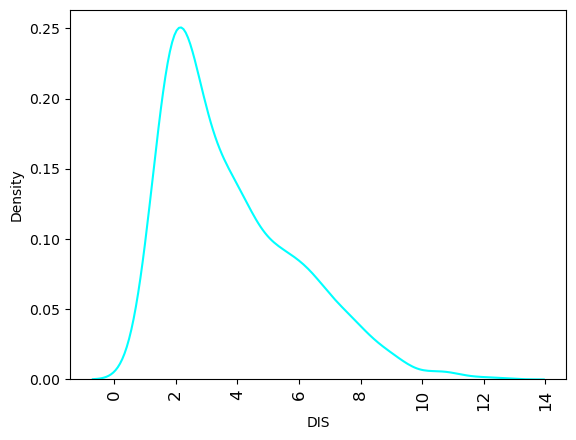

In [27]:
sns.kdeplot(data,
            x=data.DIS,
           color='cyan')


plt.xticks(label="Columns",
           rotation=90,
          fontsize=12
          )

plt.show()

#### Number of Rooms

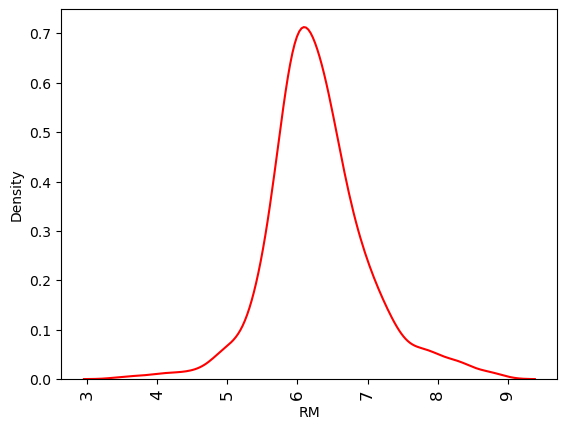

In [28]:
sns.kdeplot(data,
            x=data.RM,
           color='red')


plt.xticks(label="Columns",
           rotation=90,
          fontsize=12
          )

plt.show()

#### Access to Highways 🛣

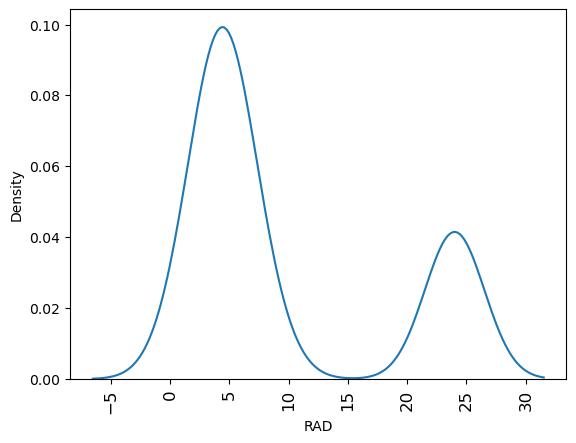

In [29]:
sns.kdeplot(data,
            x=data.RAD)


plt.xticks(label="Columns",
           rotation=90,
          fontsize=12
          )

plt.show()

#### Next to the River? ⛵️

**Challenge**

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png height=350>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [30]:
data.CHAS.value_counts()


0.00    471
1.00     35
Name: CHAS, dtype: int64

In [31]:
fig = px.bar(data.CHAS.value_counts(),
            x=data.CHAS.value_counts().index,
            y=data.CHAS.value_counts().values,
            title="Property Located Next to the River?",
            )

fig.update_layout(
                  xaxis=dict(title="1=Yes,0=No",) ,
                  yaxis=dict(title="Number of Homes") )

fig.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot


There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? I Expect None
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)? I expect linear
* What about the amount of poverty in an area (LSTAT) and home prices?  I expect inverse

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`. 

In [32]:

# sns.pairplot(data) # Do not run this again 

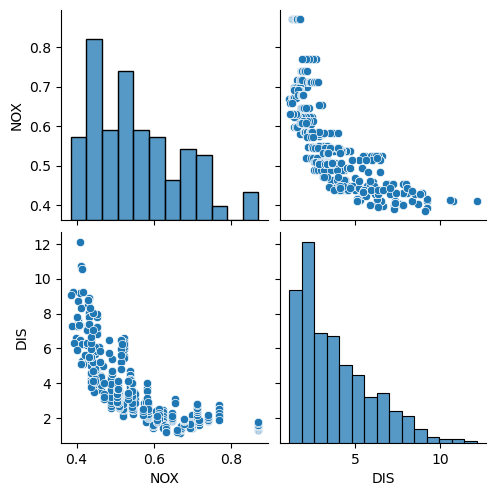

In [33]:
sns.pairplot(data[["NOX", "DIS"]])

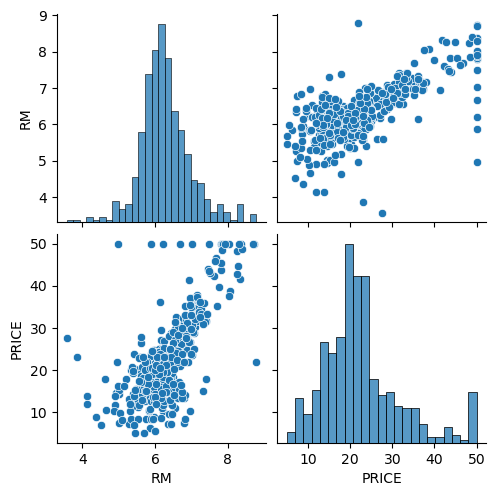

In [34]:
sns.pairplot(data[['RM', 'PRICE']])

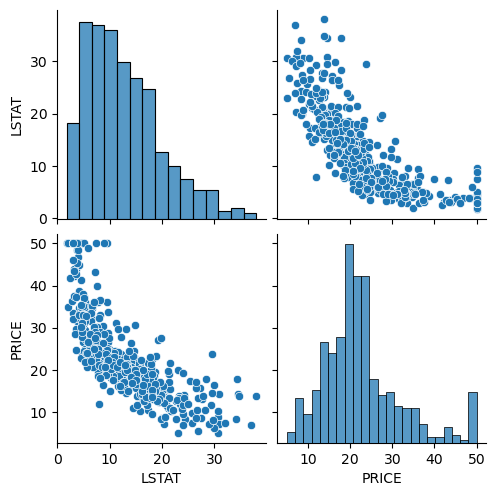

In [35]:
sns.pairplot(data[['LSTAT', "PRICE"]])

**Challenge**

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Try adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

#### Distance from Employment vs. Pollution

**Challenge**: 

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases? 

In [36]:
for col,col_explanation in zip(data.columns, column_explanations):
    print(col, '\t', col_explanation)

CRIM 	 per capita crime rate by town
ZN 	 proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS 	 proportion of non-retail business acres per town
CHAS 	 Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX 	 nitric oxides concentration (parts per 10 million)
RM 	 average number of rooms per dwelling
AGE 	 proportion of owner-occupied units built prior to 1940
DIS 	 weighted distances to five Boston employment centres
RAD 	 index of accessibility to radial highways
TAX 	 full-value property-tax rate per $10,000
PTRATIO 	 pupil-teacher ratio by town
B 	 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT 	 % lower status of the population
PRICE 	 Median value of owner-occupied homes in $1000


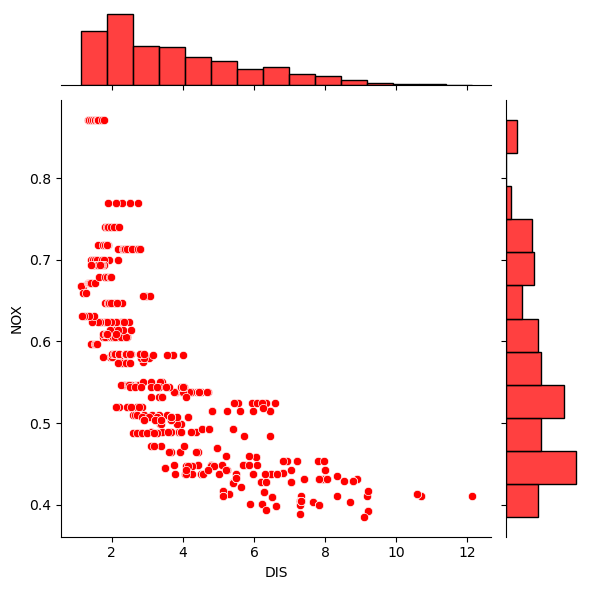

In [37]:
sns.jointplot(data, x='DIS', y='NOX', 
              joint_kws={'alpha': 1},
             color='red')


# DIS vs NOX
## Distance vs level of pollution

<p>
    We observe that further distances to DIS has a lower NOX.
    Makes sense nitric oxides concentration (parts per 10 million) will be higher in Boston employment centres
    
</p>    

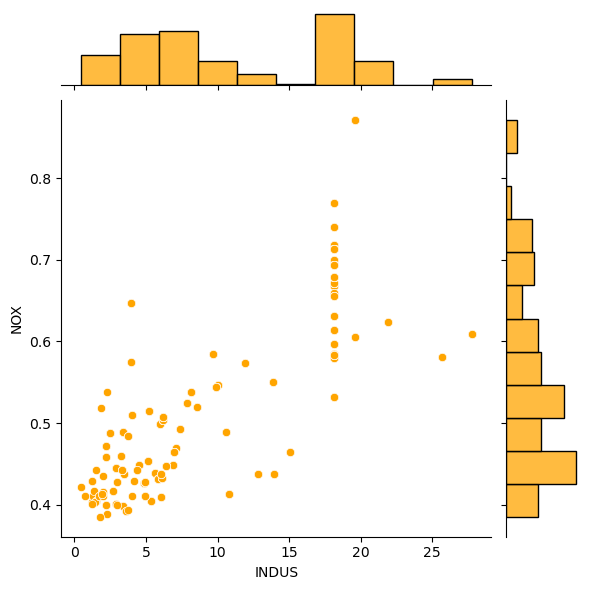

In [38]:
sns.jointplot(data, x='INDUS', y='NOX', 
              joint_kws={'alpha': 1},
             color='orange')

# NOX VS Indus
## Level of NO vs proportion of non-retail business acres per town (factories)

<p>
    We observe that there are higher levels of NOX closer to factories,
    again this makes sense
    
</p>    

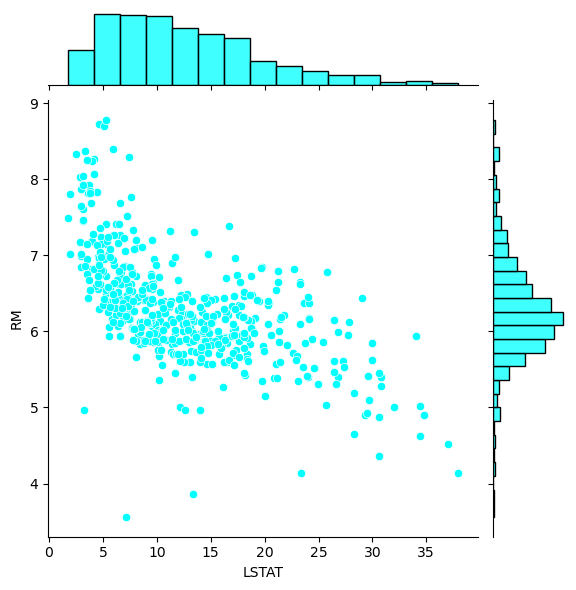

In [39]:
sns.jointplot(data, x='LSTAT', y='RM', 
              joint_kws={'alpha': 1},
             color='cyan')

# RM  VS LSTAT
## Number of Rooms vs % lower status of the population (lower income earners)

<p>
    We notice a linear relationship where greater relative distance to poverty means a home with fewer 
    rooms, and a further distance from proverty means an increase in rooms per home
    
</p>    

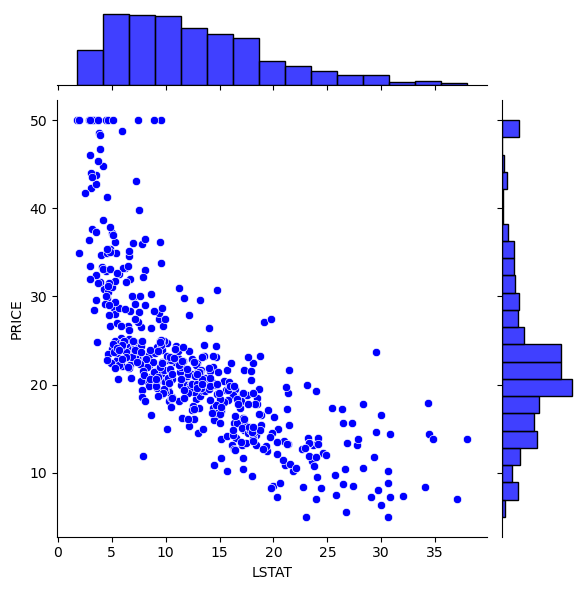

In [40]:
sns.jointplot(data, x='LSTAT', y='PRICE', 
              joint_kws={'alpha': 1},
             color='blue')

# PRICE  VS LSTAT
<h2>Cost of home in thousands of $ vs percentage of lower status of the population (lower income earners) </h2>
<p>
    We again notice a linear relationship whereby a house that costs more will be associated with purchasers whom 
    are further away from poverty and houses that cost less are associated with purchasers who are closer to the poverty line.
</p>    

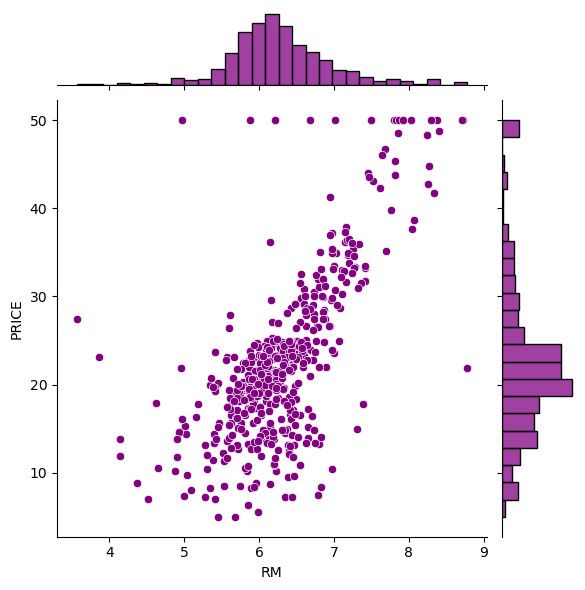

In [41]:
sns.jointplot(data, x='RM', y='PRICE', 
              joint_kws={'alpha': 1,
                        },
             color='purple')

# PRICE  VS RM
<h2>Cost of home in thousands of $ vs Number of rooms </h2>
<p>
    Increasing cost of homes, increasing number of rooms
</p>    

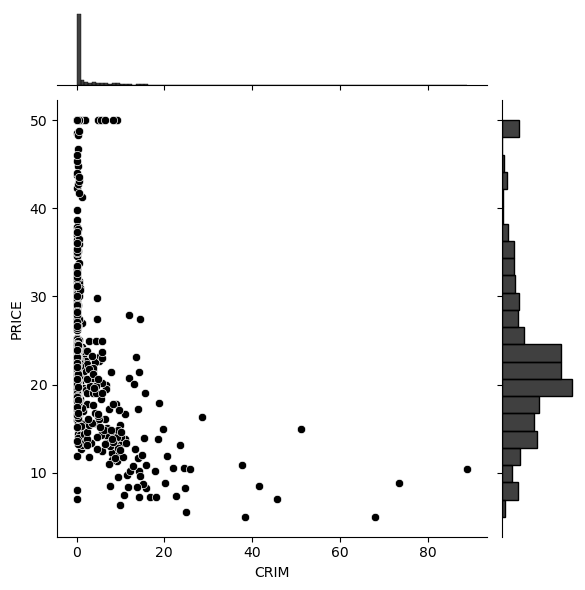

In [42]:
sns.jointplot(data, x='CRIM', y='PRICE', 
              joint_kws={'alpha': 1,
                        },
             color='black')

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

In [43]:
print("Done")

Done


#### % of Lower Income Population vs Average Number of Rooms

**Challenge** 

Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

In [44]:
print("Done")

Done


#### % of Lower Income Population versus Home Price

**Challenge**

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

In [45]:
print("Done")

Done


#### Number of Rooms versus Home Value

**Challenge** 

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

In [46]:
print("DOne")

DOne


# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 

**Challenge**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20. 
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning. 


Hint: Remember, your **target** is your home PRICE, and your **features** are all the other columns you'll use to predict the price. 


In [47]:
print("First we need to divide our data into features(X) and labels(Y) ")

First we need to divide our data into features(X) and labels(Y) 


In [48]:
print("What features can we use to predict home price, from above? ")
print("Number of rooms, Level of poverty, distance to highways, adjacewnt to the lake, and crime")

What features can we use to predict home price, from above? 
Number of rooms, Level of poverty, distance to highways, adjacewnt to the lake, and crime


In [49]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

We will use:

CRIM, RM,LSTAT, DIS,CHAS

In [153]:
X = data[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

y = data['PRICE'] # What we trying to predict

The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model.

The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. 

We can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.

In [154]:
# Finding price based on the set of features
X_train,X_test, y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=10,
                                                 train_size=0.8,
                                                  test_size=0.2
                                                 )

In [155]:
print("X_train")


X_train


In [156]:
X_train

CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS   RAD    TAX  PTRATIO  \
50   0.09 21.00   5.64  0.00 0.44 5.96  45.70 6.81  4.00 243.00    16.80   
367 13.52  0.00  18.10  0.00 0.63 3.86 100.00 1.51 24.00 666.00    20.20   
34   1.61  0.00   8.14  0.00 0.54 6.10  96.90 3.76  4.00 307.00    21.00   
78   0.06  0.00  12.83  0.00 0.44 6.23  53.70 5.01  5.00 398.00    18.70   
172  0.14  0.00   4.05  0.00 0.51 5.57  88.50 2.60  5.00 296.00    16.60   
..    ...   ...    ...   ...  ...  ...    ...  ...   ...    ...      ...   
320  0.17  0.00   7.38  0.00 0.49 6.43  52.30 4.54  5.00 287.00    19.60   
15   0.63  0.00   8.14  0.00 0.54 5.83  56.50 4.50  4.00 307.00    21.00   
484  2.38  0.00  18.10  0.00 0.58 5.87  41.90 3.72 24.00 666.00    20.20   
125  0.17  0.00  25.65  0.00 0.58 5.99  88.40 1.99  2.00 188.00    19.10   
265  0.76 20.00   3.97  0.00 0.65 5.56  62.80 1.99  5.00 264.00    13.00   

         B  LSTAT  
50  395.56  13.45  
367 131.42  13.33  
34  248.31  20.34  
78  386.40  12.34  
172 396.90  14.69  
..     ...    ...  
320 396.90   7.20  
15  395.62   8.47  
484 370.73  13.34  
125 385.02  14.81  
265 392.40  10.45  

[404 rows x 13 columns]

In [157]:
X_test

CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD    TAX  PTRATIO  \
305  0.05 33.00   2.18  0.00 0.47 6.62  58.10 3.37 7.00 222.00    18.40   
193  0.02 60.00   2.93  0.00 0.40 6.80   9.90 6.22 1.00 265.00    15.60   
65   0.04 80.00   3.37  0.00 0.40 6.29  17.80 6.61 4.00 337.00    16.10   
349  0.03 40.00   1.25  0.00 0.43 6.94  34.50 8.79 1.00 335.00    19.70   
151  1.50  0.00  19.58  0.00 0.87 5.40 100.00 1.59 5.00 403.00    14.70   
..    ...   ...    ...   ...  ...  ...    ...  ...  ...    ...      ...   
208  0.14  0.00  10.59  1.00 0.49 6.06  59.10 4.24 4.00 277.00    18.60   
174  0.08  0.00   4.05  0.00 0.51 5.86  68.70 2.70 5.00 296.00    16.60   
108  0.13  0.00   8.56  0.00 0.52 6.47  97.10 2.43 5.00 384.00    20.90   
242  0.10 30.00   4.93  0.00 0.43 6.36  52.90 7.04 6.00 300.00    16.60   
102  0.23  0.00   8.56  0.00 0.52 6.41  85.40 2.71 5.00 384.00    20.90   

         B  LSTAT  
305 393.36   8.93  
193 393.37   5.03  
65  396.90   4.67  
349 389.85   5.89  
151 341.60  13.28  
..     ...    ...  
208 381.32  14.66  
174 393.23   9.64  
108 395.24  12.27  
242 372.75  11.22  
102  70.80  10.63  

[102 rows x 13 columns]

# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

**Challenge**

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [158]:
clf = LinearRegression()

In [159]:
clf.fit(X_train,y_train)

LinearRegression()

In [160]:
# Theta Zero : The Y we are predicting, where the line intercepts y-axis how much a home cost if all else is 0
clf.intercept_

36.53305138282446

In [161]:
# The coefficients
clf.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [162]:
# Regression score
print(f"The accuracy of our model : {(clf.score(X_test,y_test) * 100) }%")

The accuracy of our model : 67.09339839115638%


In [163]:
# Let us try predictio 

In [164]:
X_test

CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD    TAX  PTRATIO  \
305  0.05 33.00   2.18  0.00 0.47 6.62  58.10 3.37 7.00 222.00    18.40   
193  0.02 60.00   2.93  0.00 0.40 6.80   9.90 6.22 1.00 265.00    15.60   
65   0.04 80.00   3.37  0.00 0.40 6.29  17.80 6.61 4.00 337.00    16.10   
349  0.03 40.00   1.25  0.00 0.43 6.94  34.50 8.79 1.00 335.00    19.70   
151  1.50  0.00  19.58  0.00 0.87 5.40 100.00 1.59 5.00 403.00    14.70   
..    ...   ...    ...   ...  ...  ...    ...  ...  ...    ...      ...   
208  0.14  0.00  10.59  1.00 0.49 6.06  59.10 4.24 4.00 277.00    18.60   
174  0.08  0.00   4.05  0.00 0.51 5.86  68.70 2.70 5.00 296.00    16.60   
108  0.13  0.00   8.56  0.00 0.52 6.47  97.10 2.43 5.00 384.00    20.90   
242  0.10 30.00   4.93  0.00 0.43 6.36  52.90 7.04 6.00 300.00    16.60   
102  0.23  0.00   8.56  0.00 0.52 6.41  85.40 2.71 5.00 384.00    20.90   

         B  LSTAT  
305 393.36   8.93  
193 393.37   5.03  
65  396.90   4.67  
349 389.85   5.89  
151 341.60  13.28  
..     ...    ...  
208 381.32  14.66  
174 393.23   9.64  
108 395.24  12.27  
242 372.75  11.22  
102  70.80  10.63  

[102 rows x 13 columns]

In [165]:
data.iloc[X_test.index[:10]]

CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS   RAD    TAX  PTRATIO  \
305  0.05 33.00   2.18  0.00 0.47 6.62  58.10 3.37  7.00 222.00    18.40   
193  0.02 60.00   2.93  0.00 0.40 6.80   9.90 6.22  1.00 265.00    15.60   
65   0.04 80.00   3.37  0.00 0.40 6.29  17.80 6.61  4.00 337.00    16.10   
349  0.03 40.00   1.25  0.00 0.43 6.94  34.50 8.79  1.00 335.00    19.70   
151  1.50  0.00  19.58  0.00 0.87 5.40 100.00 1.59  5.00 403.00    14.70   
433  5.58  0.00  18.10  0.00 0.71 6.44  87.90 2.32 24.00 666.00    20.20   
161  1.46  0.00  19.58  0.00 0.60 7.49  90.80 1.97  5.00 403.00    14.70   
129  0.88  0.00  21.89  0.00 0.62 5.64  94.70 1.98  4.00 437.00    21.20   
269  0.09 20.00   6.96  1.00 0.46 5.92  61.50 3.92  3.00 223.00    18.60   
226  0.38  0.00   6.20  0.00 0.50 8.04  86.50 3.22  8.00 307.00    17.40   

         B  LSTAT  PRICE  
305 393.36   8.93  28.40  
193 393.37   5.03  31.10  
65  396.90   4.67  23.50  
349 389.85   5.89  26.60  
151 341.60  13.28  19.60  
433 100.19  16.22  14.30  
161 374.43   1.73  50.00  
129 396.90  18.34  14.30  
269 391.34  13.65  20.70  
226 387.38   3.13  37.60

In [166]:
clf.predict(X_test)[:10]

array([31.0789639 , 31.721694  , 30.87314928, 22.28234976, 18.85606115,
       16.47132499, 36.05004157, 14.64032337, 25.24078574, 36.92073901])

In [167]:
print("The prediction explains up to 67% of the outcomes")
print("Below are the actual values")

The prediction explains up to 67% of the outcomes
Below are the actual values


In [168]:
y_test[:10]

305   28.40
193   31.10
65    23.50
349   26.60
151   19.60
433   14.30
161   50.00
129   14.30
269   20.70
226   37.60
Name: PRICE, dtype: float64

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

**Challenge** Print out the coefficients (the thetas in the equation above) for the features. Hint: You'll see a nice table if you stick the coefficients in a DataFrame. 

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room? 

In [169]:
# WHat are the training values?
X

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0    0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1    0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2    0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3    0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4    0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   
..    ...   ...    ...   ...  ...  ...   ...  ...  ...    ...      ...    ...   
501  0.06  0.00  11.93  0.00 0.57 6.59 69.10 2.48 1.00 273.00    21.00 391.99   
502  0.05  0.00  11.93  0.00 0.57 6.12 76.70 2.29 1.00 273.00    21.00 396.90   
503  0.06  0.00  11.93  0.00 0.57 6.98 91.00 2.17 1.00 273.00    21.00 396.90   
504  0.11  0.00  11.93  0.00 0.57 6.79 89.30 2.39 1.00 273.00    21.00 393.45   
505  0.05  0.00  11.93  0.00 0.57 6.03 80.80 2.50 1.00 273.00    21.00 396.90   

     LSTAT  
0     4.98  
1     9.14  
2     4.03  
3     2.94  
4     5.33  
..     ...  
501   9.67  
502   9.08  
503   5.64  
504   6.48  
505   7.88  

[506 rows x 13 columns]

In [170]:
clf.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [171]:
print("Line the 13 values with their expected effect on the HOuse price")

Line the 13 values with their expected effect on the HOuse price


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

**Challenge**: Create two scatter plots.

The first plot should be actual values (`y_train`) against the predicted value values: 

<img src=https://i.imgur.com/YMttBNV.png height=350>

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for: 

<img src=https://i.imgur.com/HphsBsj.png height=350>



In [192]:
predicated_values = clf.predict(X_train)

In [193]:

residuals = y_train - predicated_values

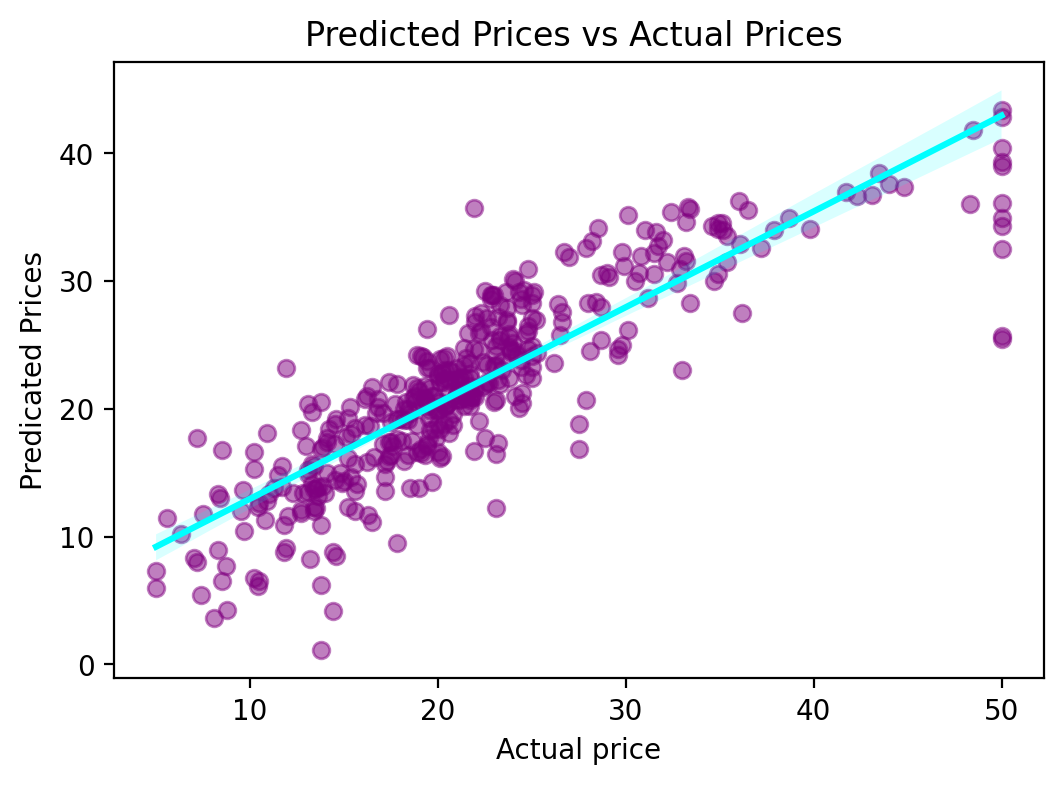

In [194]:
plt.figure(figsize=(6,4), dpi=200)
plt.title("Predicted Prices vs Actual Prices ")

ax = sns.regplot(x=y_train,
                y=predicated_values,
                color="purple",
                scatter_kws={'alpha': 0.5},
                line_kws={'color':'cyan'}
            )

ax.set(ylabel="Predicated Prices",
      xlabel="Actual price")
plt.show()

In [72]:
print("The second plot will be the residuals against the predicted prices. ")

The second plot will be the residuals against the predicted prices. 


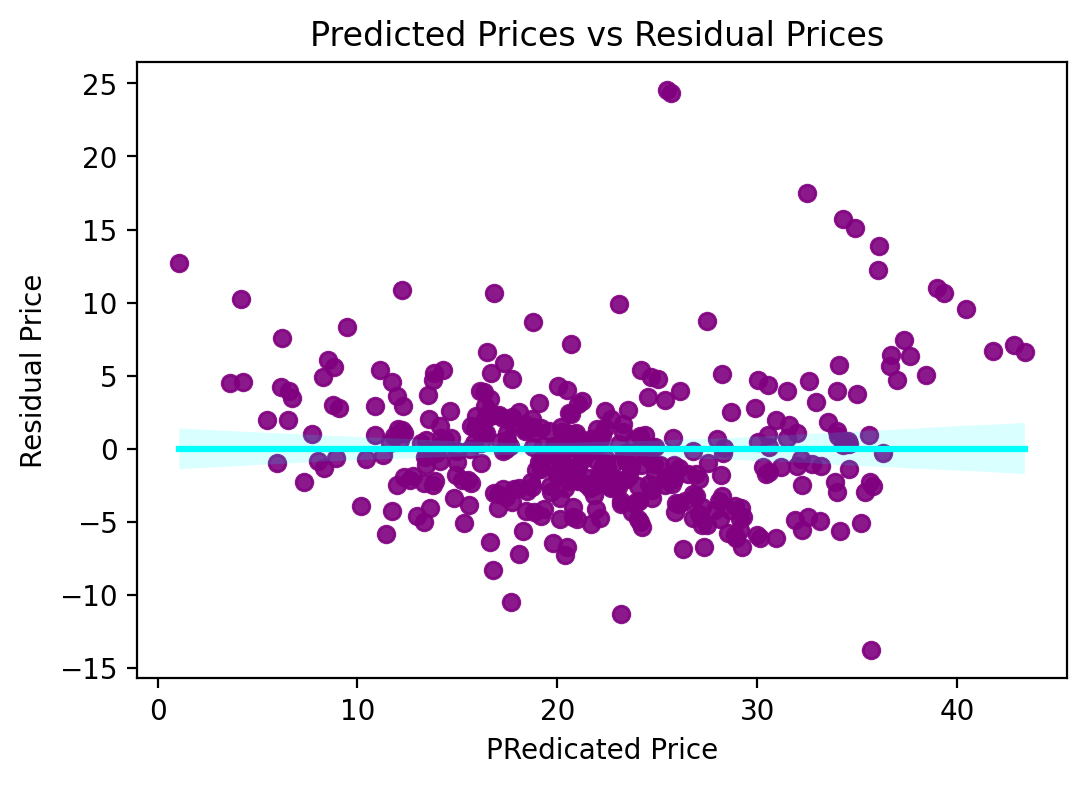

In [173]:
plt.figure(figsize=(6,4), dpi=200)
plt.title("Predicted Prices vs Residual Prices ")

ax = sns.regplot(x=predicated_values,
                y=residuals,
                color="purple",
                scatter_kws={'alpha': 0.9},
                line_kws={'color':'cyan'}
            )

ax.set(ylabel="Residual Price",
      xlabel="PRedicated Price")
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>

**Challenge**

* Calculate the mean and the skewness of the residuals. 
* Again, use Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much? 
* Is the mean different from zero?

In [74]:
residuals.mean()

-1.4333968555556477e-15

In [75]:
residuals.skew() # Positive skew

1.4594428196679827

<Figure size 1600x1200 with 0 Axes>

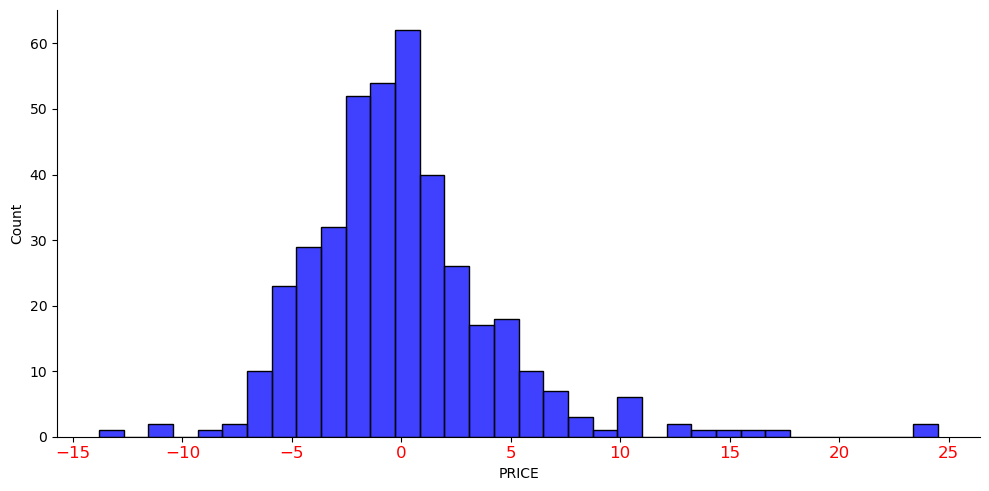

In [76]:
plt.figure(figsize=(8,6), dpi=200)

sns.displot(residuals,
            aspect=2,
           legend=True,
            color='blue'
           )

plt.xticks(label="Price $000's ",
           rotation=0,
          fontsize=12,
           color='red'
           
          )

plt.show()

In [77]:
residuals_df = pd.DataFrame(residuals)

In [78]:
residuals_df

PRICE
50   -1.33
367  10.88
34   -0.25
78    0.46
172  -0.31
..     ...
320  -1.05
15    0.01
484   1.43
125  -1.01
265  -5.77

[404 rows x 1 columns]

<Axes: xlabel='PRICE', ylabel='Density'>

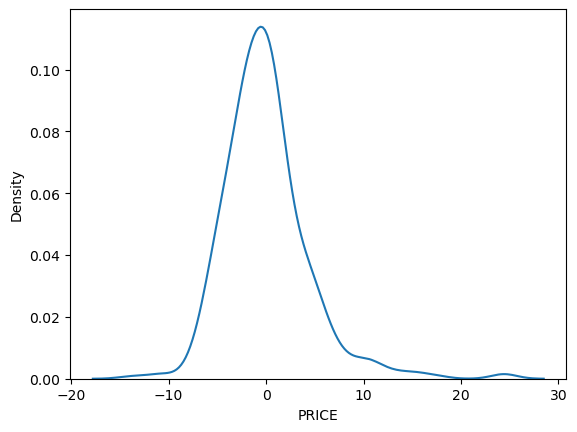

In [79]:
sns.kdeplot(residuals_df,
            x='PRICE')

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

**Let's try a data transformation approach.**

**Challenge**

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. 

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data. 
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew. 
* Which distribution has a skew that's closer to zero? 


In [80]:
data['PRICE'].head(4)

0   24.00
1   21.60
2   34.70
3   33.40
Name: PRICE, dtype: float64

In [81]:
data['PRICE'].skew() # Well the data is right skewned as according to what a log transformation is: 

1.1080984082549072

Log transformation is a feature transformation technique used in data analysis and machine learning1. It modifies the values of a numeric variable by taking the logarithm of each value. The logarithm function used in the transformation is typically the natural logarithm (base e) or the logarithm with base 101. Log transform is one of the simplest transformations on the data in which the log is applied to every single distribution of the data and the result from the log is considered the final day to feed the machine learning algorithms2. It performs well on right-skewed dataLog transformation is a feature transformation technique used in data analysis and machine learning1. It modifies the values of a numeric variable by taking the logarithm of each value. The logarithm function used in the transformation is typically the natural logarithm (base e) or the logarithm with base 101. Log transform is one of the simplest transformations on the data in which the log is applied to every single distribution of the data and the result from the log is considered the final day to feed the machine learning algorithms2. It performs well on right-skewed data

In [82]:
price_log_transform = np.log(data.PRICE)

In [83]:
price_log_transform.head(4)

0   3.18
1   3.07
2   3.55
3   3.51
Name: PRICE, dtype: float64

In [84]:
price_log_transform.skew() # much closer to 0

-0.33032129530987864

<Figure size 1600x1200 with 0 Axes>

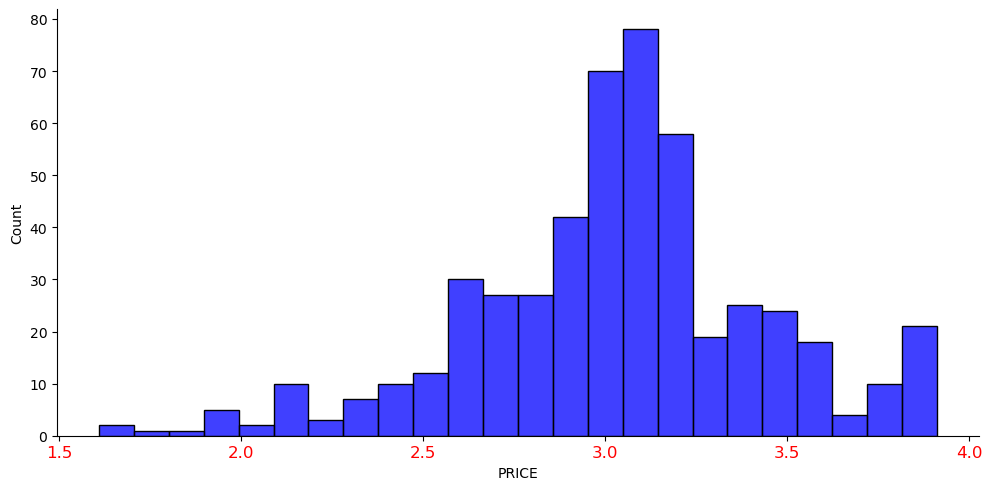

In [85]:
plt.figure(figsize=(8,6), dpi=200)

sns.displot(price_log_transform,
            aspect=2,
           legend=True,
            color='blue'
           )

plt.xticks(label="Price",
           rotation=0,
          fontsize=12,
           color='red'
           
          )

plt.show()

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices. 

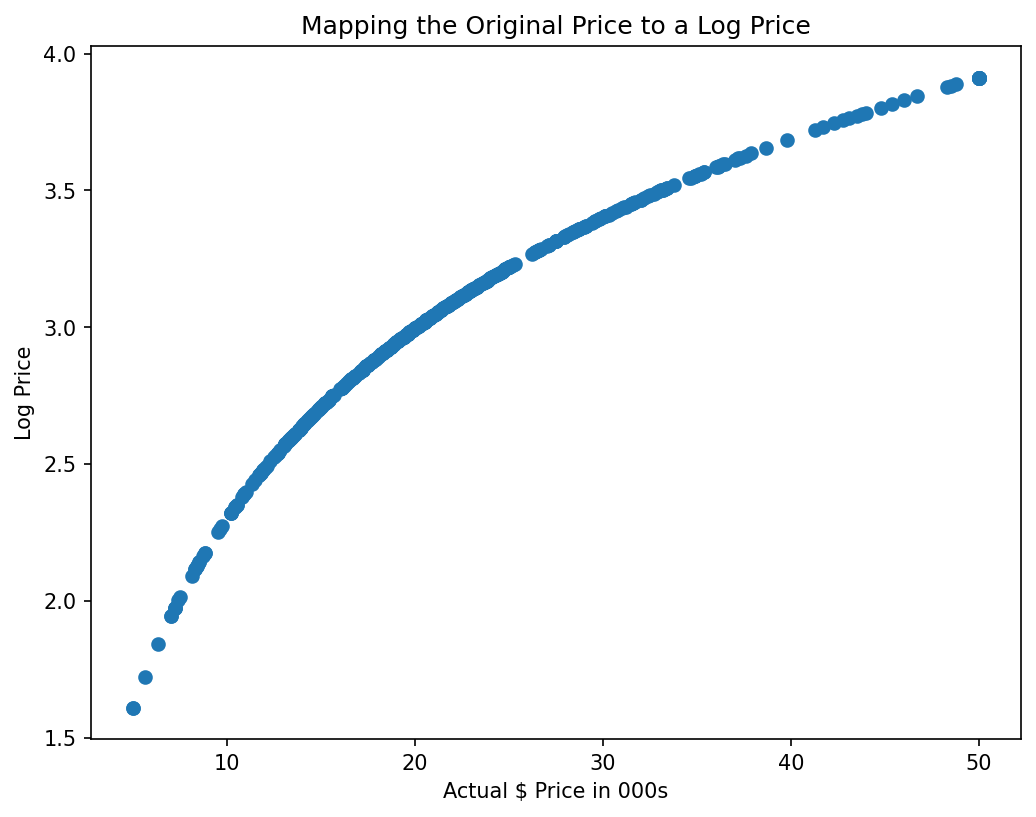

In [91]:
plt.figure(dpi=150, figsize=(8,6))
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

**Challenge**: 

* Use `train_test_split()` with the same random state as before to make the results comparable. 
* Run a second regression, but this time use the transformed target data. 
* What is the r-squared of the regression on the training data? 
* Have we improved the fit of our model compared to before based on this measure?


### Previous X and Y

X = data[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # What we used to predict

y = data['PRICE'] # What we trying to predict

In [174]:
X_New = data[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] # What we used to predict

y_New = price_log_transform # What we trying to predict

In [175]:
X_train_new,X_test_new, y_train_new,y_test_new = train_test_split(X_New,
                                                 y_New,
                                                 random_state=10,
                                                 train_size=0.8,
                                                  test_size=0.2
                                                 )

In [176]:
clf_new = LinearRegression()

In [177]:
clf_new.fit(X_train_new,y_train_new)

LinearRegression()

In [144]:
clf_new.intercept_

4.059943871775202

In [179]:
clf_new.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [182]:
# Regression score
print(f"The accuracy of our model is {clf_new.score(X_train_new,y_train_new) * 100} % ")

The accuracy of our model is 79.30234826697584 % 


In [183]:
print("It appears that our regression is now far better ")

It appears that our regression is now far better 


In [184]:
clf_new.predict(X_test)[:10]

array([3.39421046, 3.43441934, 3.41176747, 3.06945742, 2.92845067,
       2.72402178, 3.62353505, 2.71520447, 3.17932185, 3.63129825])

In [186]:
clf_new.predict(X_test)[:10] - y_test_new[:10] # WE notice a much smaller margin of error, in our predictions and the actual values

305    0.05
193   -0.00
65     0.25
349   -0.21
151   -0.05
433    0.06
161   -0.29
129    0.05
269    0.15
226    0.00
Name: PRICE, dtype: float64

## Evaluating Coefficients with Log Prices

**Challenge**: Print out the coefficients of the new regression model. 

* Do the coefficients still have the expected sign? 
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher? 

Hint: Use a DataFrame to make the output look pretty. 

In [110]:
print("The features we used\n")
X.columns


The features we used



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [112]:
for col,col_explanation in zip(data.columns, column_explanations):
    print(col, '\t', col_explanation)

CRIM 	 per capita crime rate by town
ZN 	 proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS 	 proportion of non-retail business acres per town
CHAS 	 Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX 	 nitric oxides concentration (parts per 10 million)
RM 	 average number of rooms per dwelling
AGE 	 proportion of owner-occupied units built prior to 1940
DIS 	 weighted distances to five Boston employment centres
RAD 	 index of accessibility to radial highways
TAX 	 full-value property-tax rate per $10,000
PTRATIO 	 pupil-teacher ratio by town
B 	 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT 	 % lower status of the population
PRICE 	 Median value of owner-occupied homes in $1000


In [113]:
clf.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [114]:
print("We can see that CHAS has a strong correlation to House Price")

We can see that CHAS has a strong correlation to House Price


In [115]:
print("It appears that the PRATIO Has a negative effect on the house price ")

It appears that the PRATIO Has a negative effect on the house price 


## Regression with Log Prices & Residual Plots

**Challenge**: 

* Copy-paste the cell where you've created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values. 
* Add 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side. 
* Use `indigo` as the colour for the original regression and `navy` for the color using log prices.

In [195]:
predicated_values_new = clf.predict(X_train_new)
residuals_new = y_train_new - predicated_values_new

In [197]:
predicated_values_new[:5]

array([21.02958601, 12.21844467, 13.74785342, 20.7351517 , 23.41262356])

In [198]:
residuals_new[:5]

50    -18.05
367    -9.08
34    -11.15
78    -17.68
172   -20.27
Name: PRICE, dtype: float64

C:\Users\ashis\AppData\Local\Temp\ipykernel_5164\4074181015.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



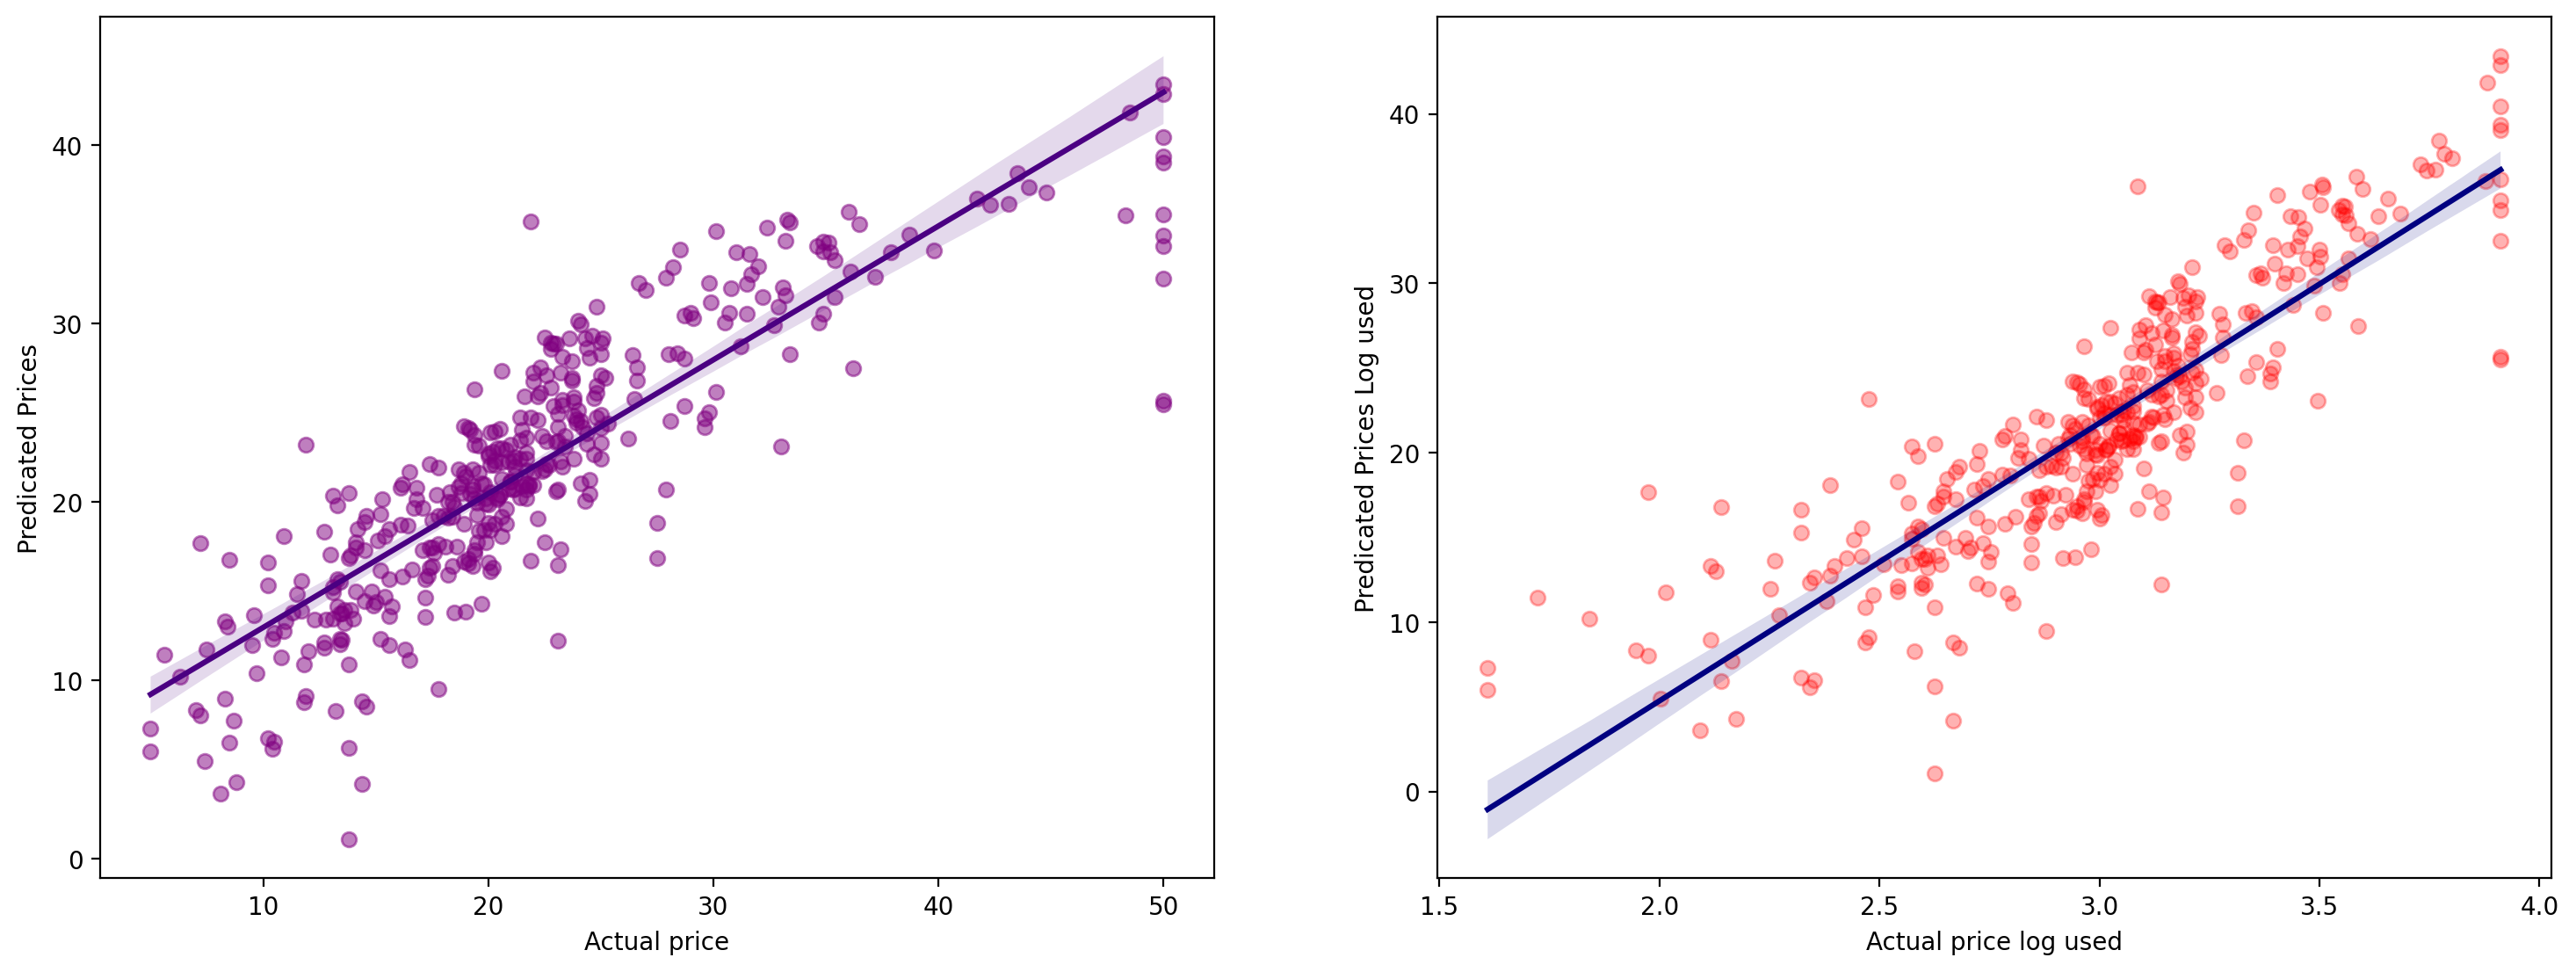

In [210]:
# Initial plot
plt.figure(figsize=(18,14), dpi=200)

plt.title("Predicted Prices vs Actual Prices ")

plt.subplot(2,2,1)
ax = sns.regplot(x=y_train,
                y=predicated_values,
                color="purple",
                scatter_kws={'alpha': 0.5},
                line_kws={'color':'indigo'}
            )

ax.set(ylabel="Predicated Prices",
      xlabel="Actual price")

plt.subplot(2,2,2)
ax = sns.regplot(x=y_train_new,
                y=predicated_values_new,
                color="red",
                scatter_kws={'alpha': 0.3},
                line_kws={'color':'navy'}
            )

ax.set(ylabel="Predicated Prices Log used",
      xlabel="Actual price log used")


plt.show()


In [211]:
print("We do see a lot more data points in the 2nd figure congregated close to the line")

We do see a lot more data points in the 2nd figure congregated close to the line


**Challenge**: 

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [212]:
residuals_new.mean()

-18.836238307815993

In [213]:
residuals_new.skew()

-0.18691946816468966

In [215]:
print("Much closer to 0 and therefore normal distributio")

Much closer to 0 and therefore normal distributio


# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

**Challenge**

Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [218]:
# # R-squared
clf_new.score(X_train_new,y_train_new) * 100

79.30234826697584

In [220]:
clf.score(X_train,y_train) * 100

75.0121534530608

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [222]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  
0  12.65

In [ ]:
# regression.intercept_[0]+ regression.coef_[0][0]*35000000


**Challenge**

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value. 

In [238]:
clf_new.coef_.sum() # We make life easier by summing first

-0.6560144200309138

In [244]:
(property_stats * clf_new.coef_).values.sum() # make life easy easy

-1.0296566412118073

In [263]:
(clf_new.intercept_ + (property_stats * clf_new.coef_).values.sum() )

3.0302872305633946

In [271]:
avg = np.exp(3.0302872305633946) 

In [273]:
avg * 1000

20703.17832102391

**Challenge**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [279]:
property_stats

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  3.61 11.36  11.14  0.07 0.55 6.28 68.57 3.80 9.55 408.24    18.46 356.67   

   LSTAT  
0  12.65

In [284]:
# for col,col_explanation in zip(data.columns, column_explanations):
#     print(col, '\t', col_explanation)

In [274]:
# Define Property Characteristics
next_to_river = True # CHAS 
nr_rooms = 8 #RM
students_per_classroom = 20 # PTRATIO 
distance_to_town = 5 # DIS
pollution = data.NOX.quantile(q=0.75) # high NOX
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low LSTAT

In [289]:
X_New.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [290]:
clf_new.coef_

array([-1.06717261e-02,  1.57929102e-03,  2.02989827e-03,  8.03305301e-02,
       -7.04068057e-01,  7.34044072e-02,  7.63301755e-04, -4.76332789e-02,
        1.45651350e-02, -6.44998303e-04, -3.47947628e-02,  5.15896157e-04,
       -3.13900565e-02])

In [302]:
property_characteristics = [property_stats.CRIM.values[0], property_stats.ZN.values[0], property_stats.INDUS.values[0], 1, pollution, nr_rooms, property_stats.AGE.values[0], 
                distance_to_town,property_stats.RAD.values[0],property_stats.TAX.values[0],students_per_classroom,property_stats.B.values[0], 
                amount_of_poverty]

In [303]:
property_characteristics

[3.613523557312254,
 11.363636363636363,
 11.13677865612648,
 1,
 0.624,
 8,
 68.57490118577076,
 5,
 9.549407114624506,
 408.2371541501976,
 20,
 356.6740316205534,
 6.949999999999999]

In [312]:
# Solution:
pre_log =  (clf_new.intercept_ +  (clf_new.coef_ * property_characteristics).sum())


In [314]:
pre_log

3.2500653694409225

In [317]:
print(f"The predicated house price with the previous stats is : ${np.exp(3.2500653694409225) * 1000} ")

The predicated house price with the previous stats is : $25792.025872399023 


# Done